In [86]:
import pandas as pd
import numpy as np


#df = pd.read_csv('H:/Datasets/UNSW-NB15/training/UNSW_NB15_training.csv', header=None)
df = pd.read_csv('H:/Datasets/UNSW-NB15/training/UNSW_NB15_testing.csv', header=None)

print("Read {} rows.".format(len(df)))

#df.dropna(inplace=True,axis=1) 
# For now, just drop NA's (rows with missing values)

# The CSV file has no column heads, so add them
df.columns = [
'dur',
'prototype',
'service',
'state',
'spkts',
'dpkts',
'sbytes',
'dbytes',
'rate',
'sttl',
'dttl',
'sload',
'dload',
'sloss',
'dloss',
'sinpkt',
'dinpkt',
'sjit',
'djit',
'swin',
'stcpb',
'dtcpb',
'dwin',
'tcprtt',
'synack',
'ackdat',
'smean',
'dmean',
'trans_depth',
'response_body_len',
'ct_srv_src',
'ct_state_ttl',
'ct_dst_ltm',
'ct_src_dport_ltm',
'ct_dst_sport_ltm',
'ct_dst_src_ltm',
'is_ftp_login',
'ct_ftp_cmd',
'ct_flw_http_mthd',
'ct_src_ltm',
'ct_srv_dst',
'is_sm_ips_ports',
'outcome'
]

pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 5)

# display 5 rows
#display(df[0:5])

print('Dimensions of the Training set:',df.shape)

Read 175341 rows.
Dimensions of the Training set: (175341, 43)


In [87]:
#Print Train with head
df.head(5)

,dur,prototype,...,is_sm_ips_ports,outcome
0,0.121478,tcp,...,0,Normal
1,0.649902,tcp,...,0,Normal
2,1.623129,tcp,...,0,Normal
3,1.681642,tcp,...,0,Normal
4,0.449454,tcp,...,0,Normal


In [88]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

In [89]:
print("Read {} rows.".format(len(df)))
print('='*40)
print('The number of data points are:', df.shape[0])
print('='*40)
print('The number of features are:', df.shape[1])
print('='*40)
output = df['outcome'].values
labels = set(output)
print('The different type of output labels are:', labels)
print('='*125)
print('The number of different output labels are:', len(labels))

Read 175341 rows.
The number of data points are: 175341
The number of features are: 43
The different type of output labels are: {'Normal', 'Generic', 'DoS', 'Reconnaissance', 'Shellcode', 'Fuzzers', 'Exploits', 'Analysis', 'Worms', 'Backdoor'}
The number of different output labels are: 10


In [90]:
# Analyze KDD-NSL
analyze(df)


175341 rows
** dur:74039 (42%)
** prototype:133 (0%)
** service:[-:53.71%,dns:26.97%,http:10.68%,smtp:2.88%,ftp-data:2.28%,ftp:1.96%,ssh:0.74%,pop3:0.63%,dhcp:0.05%,snmp:0.05%,ssl:0.03%,irc:0.01%,radius:0.01%]
** state:[INT:46.92%,FIN:44.38%,CON:7.5%,REQ:1.14%,RST:0.05%,ECO:0.01%,PAR:0.0%,URN:0.0%,no:0.0%]
** spkts:480 (0%)
** dpkts:443 (0%)
** sbytes:7214 (4%)
** dbytes:6660 (3%)
** rate:76991 (43%)
** sttl:[254:65.44%,31:22.5%,62:10.08%,0:1.8%,64:0.1%,1:0.04%,63:0.02%,255:0.01%,60:0.0%,29:0.0%,252:0.0%]
** dttl:[0:48.12%,252:28.88%,29:22.5%,60:0.49%,31:0.0%,254:0.0%]
** sload:80885 (46%)
** dload:77474 (44%)
** sloss:409 (0%)
** dloss:370 (0%)
** sinpkt:76161 (43%)
** dinpkt:74245 (42%)
** sjit:77532 (44%)
** djit:76831 (43%)
** swin:[0:54.41%,255:45.59%,14:0.0%,31:0.0%,167:0.0%,168:0.0%,42:0.0%,172:0.0%,45:0.0%,192:0.0%,87:0.0%,103:0.0%,232:0.0%]
** stcpb:75265 (42%)
** dtcpb:75089 (42%)
** dwin:[0:54.89%,255:45.1%,37:0.0%,40:0.0%,48:0.0%,70:0.0%,244:0.0%]
** tcprtt:43319 (24%)
** 

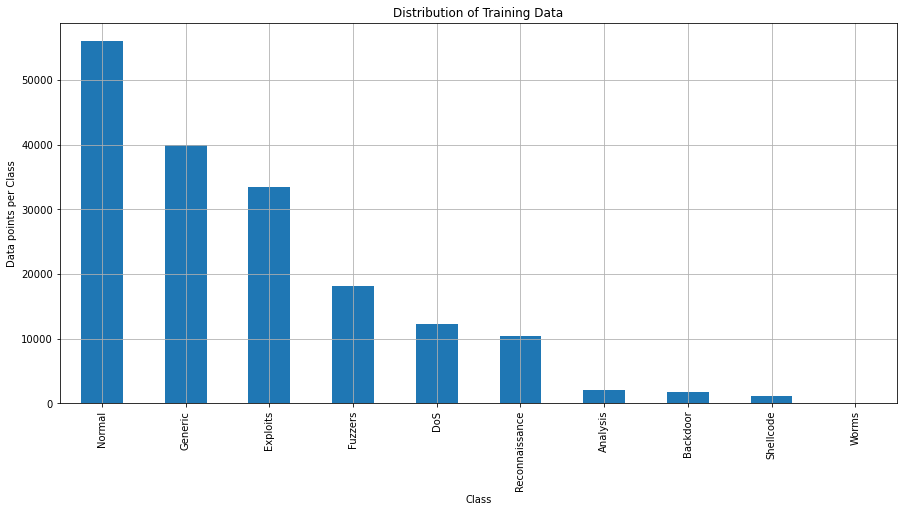

In [93]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['outcome'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Training Data')
plt.grid()
plt.show()

In [94]:
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class Normal : 56000 ( 31.938 %)
Number of data points in class Generic : 40000 ( 22.813 %)
Number of data points in class Exploits : 33393 ( 19.045 %)
Number of data points in class Fuzzers : 18184 ( 10.371 %)
Number of data points in class DoS : 12264 ( 6.994 %)
Number of data points in class Reconnaissance : 10491 ( 5.983 %)
Number of data points in class Analysis : 2000 ( 1.141 %)
Number of data points in class Backdoor : 1746 ( 0.996 %)
Number of data points in class Shellcode : 1133 ( 0.646 %)
Number of data points in class Worms : 130 ( 0.074 %)


In [95]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
# Encode text values to dummy variables(i.e. [1,0,0],
# [0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [96]:
# Now encode the feature vector

encode_numeric_zscore(df, 'dur')
encode_text_dummy(df, 'prototype')
encode_text_dummy(df, 'service')
encode_text_dummy(df, 'state')
encode_numeric_zscore(df, 'spkts')
encode_numeric_zscore(df, 'dpkts')
encode_numeric_zscore(df, 'sbytes')
encode_numeric_zscore(df, 'dbytes')
encode_numeric_zscore(df, 'rate')
encode_numeric_zscore(df, 'sttl')
encode_numeric_zscore(df, 'dttl')
encode_numeric_zscore(df, 'sload')
encode_numeric_zscore(df, 'dload')
encode_numeric_zscore(df, 'sloss')
encode_numeric_zscore(df, 'dloss')
encode_numeric_zscore(df, 'sinpkt')
encode_numeric_zscore(df, 'dinpkt')
encode_numeric_zscore(df, 'sjit')
encode_numeric_zscore(df, 'djit')
encode_numeric_zscore(df, 'swin')
encode_numeric_zscore(df, 'stcpb')
encode_numeric_zscore(df, 'dtcpb')
encode_numeric_zscore(df, 'dwin')
encode_numeric_zscore(df, 'tcprtt')
encode_numeric_zscore(df, 'synack')
encode_numeric_zscore(df, 'ackdat')
encode_numeric_zscore(df, 'smean')
encode_numeric_zscore(df, 'dmean')
encode_text_dummy(df, 'trans_depth')
encode_numeric_zscore(df, 'response_body_len')
encode_numeric_zscore(df, 'ct_srv_src')
encode_numeric_zscore(df, 'ct_state_ttl')
encode_numeric_zscore(df, 'ct_dst_ltm')
encode_numeric_zscore(df, 'ct_src_dport_ltm')
encode_numeric_zscore(df, 'ct_dst_sport_ltm')
encode_numeric_zscore(df, 'ct_dst_src_ltm')
encode_text_dummy(df, 'is_ftp_login')
encode_text_dummy(df, 'ct_ftp_cmd')
encode_text_dummy(df, 'ct_flw_http_mthd')
encode_numeric_zscore(df, 'ct_src_ltm')
encode_numeric_zscore(df, 'ct_srv_dst')
encode_text_dummy(df, 'is_sm_ips_ports')

# display 5 rows

df.dropna(inplace=True,axis=1)
df[0:5]
# This is the numeric feature vector, as it goes to the neural net


# Convert to numpy - Classification
x_columns = df.columns.drop('outcome')
x = df[x_columns].values
dummies = pd.get_dummies(df['outcome']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

In [103]:
import keras
import keras.utils
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=44)

# Create deep neural net
model = Sequential()
model.add(Dense(256, input_dim=x.shape[1], activation='relu'))
model.add(Dense(128, input_dim=x.shape[1], activation='relu'))
model.add(Dense(256, input_dim=x.shape[1], activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

#history = model.fit(x_train,y_train,validation_data=(x_test,y_test),
          #verbose=2,epochs=1000)

Epoch 1/1000
4110/4110 - 3s - loss: 0.7810 - accuracy: 0.7164 - val_loss: 0.6658 - val_accuracy: 0.7490
Epoch 2/1000
4110/4110 - 3s - loss: 0.6527 - accuracy: 0.7540 - val_loss: 0.6689 - val_accuracy: 0.7617
Epoch 3/1000
4110/4110 - 3s - loss: 0.6406 - accuracy: 0.7614 - val_loss: 0.6459 - val_accuracy: 0.7526
Epoch 4/1000
4110/4110 - 3s - loss: 0.6328 - accuracy: 0.7664 - val_loss: 0.6545 - val_accuracy: 0.7610
Epoch 5/1000
4110/4110 - 3s - loss: 0.6297 - accuracy: 0.7706 - val_loss: 0.6432 - val_accuracy: 0.7743
Epoch 6/1000
4110/4110 - 3s - loss: 0.6253 - accuracy: 0.7722 - val_loss: 0.6464 - val_accuracy: 0.7758
Epoch 7/1000
4110/4110 - 3s - loss: 0.6231 - accuracy: 0.7739 - val_loss: 0.6425 - val_accuracy: 0.7735
Epoch 8/1000
4110/4110 - 3s - loss: 0.6190 - accuracy: 0.7767 - val_loss: 0.6533 - val_accuracy: 0.7699
Epoch 9/1000
4110/4110 - 3s - loss: 0.6174 - accuracy: 0.7795 - val_loss: 0.6454 - val_accuracy: 0.7818
Epoch 10/1000
Restoring model weights from the end of the best e

In [104]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [105]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

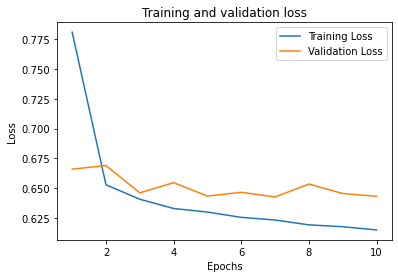

<Figure size 432x288 with 0 Axes>

In [106]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.clf()

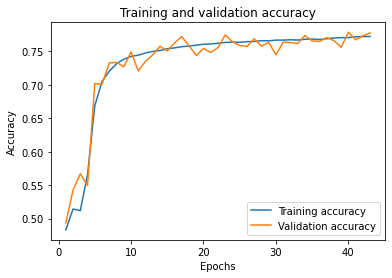

<Figure size 432x288 with 0 Axes>

In [83]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
plt.clf()

In [84]:
import seaborn as sns
import datetime as dt

def confusion_matrix_func(y_test, y_test_pred):
    
    '''
    This function computes the confusion matrix using Predicted and Actual values and plots a confusion matrix heatmap
    '''
    C = confusion_matrix(y_test, y_test_pred)
    cm_df = pd.DataFrame(C)
    labels = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']
    plt.figure(figsize=(20,15))
    sns.set(font_scale=1.4)
    sns.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    
    plt.show()

# calculate roc curve
from sklearn.metrics import *
#fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, pred)
from sklearn import preprocessing
def multiclass_roc_auc_score(y_test, pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    pred = lb.transform(pred)
    return roc_auc_score(y_test, pred, average=average)

In [85]:
# Measure accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
# calculate roc curve
from sklearn.metrics import *
#fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, pred)
from sklearn import preprocessing

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)

escore = model.evaluate(x_test, y_test, batch_size=32)

y_eval = np.argmax(y_test,axis=1)

score = accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted')

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

644/644 [==============================] - 0s 506us/step - loss: 0.7432 - accuracy: 0.7661
Validation score: 0.7660690861390468
Evaluation score: [0.7431974411010742, 0.7660691142082214]
Recall score: 0.7660690861390468
Precision score: 0.6756906891795279
F1 Measure score: 0.7034348210871086
ROC-AUC score: 0.6268263074262475


C:\Users\Maruata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
confusion_matrix_func(y_eval, pred)

ValueError: multilabel-indicator is not supported